# Блок №4 минипроект

# Описание
На этот раз данные имеют следующую структуру:

+ записываются для каждого пользователя, совершившего покупки, каждый день
+ для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
+ внутри каждой папки есть файл data.csv, где и хранятся данные

Схематично выглядит так:
```
└── data \
   ├── 2020-12-30 \
   │  ├── FirstName_LastName1 
   │  │   └── data.csv 
   │  ├── FirstName_LastName2 
   │  │   └── data.csv 
   │  └── FirstName_LastName3 
   │      └── data.csv 
   └── 2020-12-31 
      ├── FirstName_LastName1 
      │   └── data.csv 
      └── FirstName_LastName5 
          └── data.csv 
```
Например, 30 декабря три покупателя сделали покупки, 31 – два 
(папки `2020-12-30` и `2020-12-31` соответственно). Поскольку клиент `FirstName_LastName1` купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

Данные в задании покрывают другой временной период, имена тоже другие. Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.

# Задачи
1. Соберите все данные из папки `data` в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (`product_id`, `quantity`), а также имя пользователя (`name`), и дата этих покупок (`date`, соответствует названию папки, где лежит папка с пользователем)
2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с `product_id==56`?
4. Визуализируйте продажи по дням.
5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым `product_id`, совершенную в разные дни. 

Найти данные можно либо на JupyterHub, либо скачать архив [отсюда](https://disk.yandex.ru/d/assqPaZX1bXtJw).

# Задание 1
___
Соберите все данные из папки `data` в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (`product_id`, `quantity`), имя пользователя (`name`), и дату этих покупок (`date`, соответствует названию папки, где лежит папка с пользователем).

Пример итоговой таблицы:
```
    product_id  quantity    name             date
0       56          2         Anatoly_Karpov   2020-12-30
1       7           2         Anatoly_Karpov   2020-12-30
2       9           3         Anatoly_Karpov   2020-12-30
```
Для объединения датафреймов, читаемых из файлов, можно использовать метод `pd.concat()`. Например:

1. Имеются следующие данные:
```
> df_1
    product_id  quantity    name               date
0       56          2         Anatoly_Karpov     2020-12-30
1       7           2         Anatoly_Karpov     2020-12-30
2       9           3         Anatoly_Karpov     2020-12-30
```
```
> df_2
    product_id  quantity    name               date
0       4           2         Кatya_Skriptsova   2020-12-30
1       71          1         Кatya_Skriptsova   2020-12-31
```
2. Соединяем, передав `pd.concat` на вход список датафреймов, которые нужно объединить. Обратите внимание: индексы повторяются, поэтому после соединения всех данных нужно их сбросить.
```
> df = pd.concat([df_1, df_2])
> df
    product_id  quantity    name                date
0       56          2         Anatoly_Karpov      2020-12-30
1       7           2         Anatoly_Karpov      2020-12-30
2       9           3         Anatoly_Karpov      2020-12-30
0       4           2         Кatya_Skriptsova    2020-12-30
1       71          1         Кatya_Skriptsova    2020-12-31
```
В качестве ответа укажите сумму по колонке quantity.

In [5]:
# Импортируем необходимые библиотеки
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# Показывает путь до папки в которой сейчас находимся
os.getcwd()

'/home/jupyter-a.stamati-16/Lectures_4'

In [7]:
# Посмотрим содержание исходной папки с проектом
os.listdir('/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4')

['data']

In [8]:
# Посмотрим следующий уровень вложенности, сожержание папки 'data'
os.listdir('/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4/data')

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [9]:
# Посмотрим следующий уровень вложенности, содержание папки '2020-12-08'
os.listdir('/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08')

['Petr_Petrov',
 'Rostislav_Petrov',
 'Kirill_Smirnov',
 'Alexey_Fedorov',
 'Anton_Smirnov']

In [10]:
# Посмотрим следующий уровень вложенности, содержание папки 'Alexey_Fedorov'
os.listdir('/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Alexey_Fedorov')
# Получаем, что конечная папка содержит файл 'data.csv'

['data.csv']

In [11]:
# Считаем этот файл и посмотрим на содержимое
pd.read_csv('/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Alexey_Fedorov/data.csv')

,Unnamed: 0,product_id,quantity
0,0,73,5
1,1,34,1
2,2,71,1
3,3,18,2
4,4,67,2


In [12]:
# Исходный путь содержания папок с датами покупок
path = '/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4/data'

In [13]:
# Создадим генратор путей, по которому будем итерироваться в цикле
# Данный генератор проъодит по всей дерриктории и выдает пути до всеъ файлов, которые найдет
os.walk(path)

<generator object walk at 0x7fc276bdbe58>

In [14]:
# Посмотрим, что выведет данный генератор для конечной папки
for i in os.walk(path + '/2020-12-05' + '/Alexey_Petrov'):
    print(i)

('/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Petrov', [], ['data.csv'])


In [15]:
# Посмотрим, что выведет при итерации наш генератор с путем
for i in os.walk(path):
    print(i)

('/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4/data', ['2020-12-05', '2020-12-08', '2020-12-09', '2020-12-04', '2020-12-06', '2020-12-03', '2020-12-07'], [])
('/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05', ['Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Smirnov', 'Kirill_Smirnov', 'Alexey_Fedorov', 'Alexey_Petrov'], [])
('/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov', [], ['data.csv'])
('/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov', [], ['data.csv'])
('/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov', [], ['data.csv'])
('/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov', [], ['data.csv'])
('/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov', [], ['data.csv'])
('/home/ju

In [16]:
# Создадим датафрейм для всех данных
df = pd.DataFrame()

# Прочитаем данные из всех файлов и добавим их в главный датаврейм
for curren_path, dirs, files in os.walk(path):
    for file in files:
        # Конструирование полного пути до файла
        data_path = f'{curren_path}/{file}'
        
        # Достаем дату и имя
        path_parts = curren_path.split('/')
        date = path_parts[-2]
        name = path_parts[-1]
        
        # Считываем данные
        temp_df = pd.read_csv(data_path)
        
        # Добавляем к данным дату и время
        temp_df['date'] = date
        temp_df['name'] = name
        
        # Соединяем данные с главным датафреймом
        df = pd.concat((df, temp_df), axis=0)
# Посмотрим на получившийся результат
df

,Unnamed: 0,product_id,quantity,date,name
0,0,27,4,2020-12-05,Petr_Ivanov
1,1,89,1,2020-12-05,Petr_Ivanov
2,2,33,2,2020-12-05,Petr_Ivanov
3,3,8,3,2020-12-05,Petr_Ivanov
4,4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...,...
0,0,18,4,2020-12-07,Petr_Fedorov
1,1,94,4,2020-12-07,Petr_Fedorov
0,0,95,2,2020-12-07,Vasiliy_Ivanov
1,1,83,3,2020-12-07,Vasiliy_Ivanov


In [17]:
# Уберем колонку с исходными индексами
df.drop(columns=['Unnamed: 0'], inplace=True)

In [18]:
# Обновим индексы
df.reset_index(drop=True, inplace=True)

In [19]:
# Посмотрим получившийся датафрейм
df.head()

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov


In [20]:
# Ответим на вопрос задачи
df.quantity.sum()

480

In [21]:
# Дополнительный способ решить данную задачу, через библиотеку Path

# from pathlib import Path

# path = '/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4/data'

# miniproject_path = Path(path)
# miniproject_path

# dir(miniproject_path) # доступные методы

# # Вывод всех путей по нужному паттерну
# list(miniproject_path.glob('**/*.csv'))

# df = pd.DataFrame()

# for csv_path in miniproject_path.glob('**/*.csv'):
#     temp_df = pd.read_csv(csv_path)
    
#     df = pd.concat((df, temp_df))

# df.drop(columns=['Unnamed: 0'], inplace=True)

# df.reset_index(drop=True, inplace=True)

# df.head()

# Задание 2
___
Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. Например
```
Anatoly_Karpov, Nekto_Ktotovich, Lena_Uhanova, Ignat, Sasha_Tokarev
```

In [42]:
# Сгруппируем по пользователю и сумируем количество товаров и затем сортируем
df \
    .groupby('name') \
    .agg({'quantity': 'sum'}) \
    .query('quantity == quantity.max()') \
    .index.to_list()
#     .sort_values('quantity', ascending=False) \


['Alexey_Smirnov', 'Petr_Smirnov']

Ответ:
```
Alexey_Smirnov, Petr_Smirnov
```

# Задание 3
___
Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, `sns.barplot`), где:

+ по оси x – идентификаторы товаров (`product_id`) 
+ по оси y – суммарное число их покупок (сколько товаров с таким `product_id `было продано)

Для практики попробуйте изменить параметры графика: цвет (`color`), прозрачность (`alpha`), сортировку значений по оси х (`order`). 

В качестве ответа укажите, сколько было продано единиц товара с `product_id` равным 56

In [23]:
# Посмотрим на имеющиеся данные
df.head()

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov


In [24]:
# Найдем самые популярные товары, по числу проданных едениц
products_sells = df \
                    .groupby('product_id', as_index=False) \
                    .agg({'quantity': 'sum'}) \
                    .sort_values('quantity', ascending=False) \
                    .head(10) \

In [25]:
products_sells

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


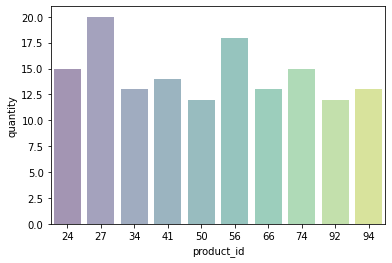

In [26]:
# Построим график
sns.barplot(data=products_sells, 
            x='product_id', 
            y='quantity',
           palette='viridis',
           alpha=0.5); #inferno

# Задание 4
___
Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).Далее выберите верные утверждения:
+ 7 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
+ Максимальное число товаров было продано 4 декабря
+ 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
+ 5 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
+ Меньше всего товаров было приобретено 6 декабря
+ Меньше всего продуктов было приобретено 4 декабря
+ 8 и 9 декабря было продано примерно одинаковое число товаров
+ 5 декабря было куплено почти в три раза меньше товаров, чем в предыдущий день

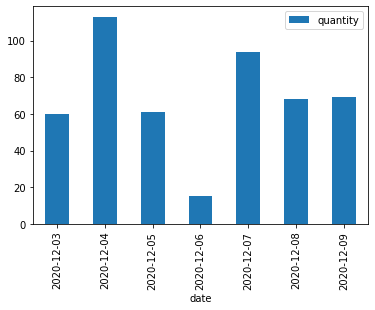

In [27]:
df.groupby('date') \
    .agg({'quantity': 'sum'}) \
    .plot(kind= 'bar');

Ответ:
+ Максимальное число товаров было продано 4 декабря
+ 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
+ Меньше всего товаров было приобретено 6 декабря
+ 8 и 9 декабря было продано примерно одинаковое число товаров

# Задание 5
___
Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым `product_id`, совершенную в разные дни. 

Например, пользователь `Sasha Tsarev` дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. `Katya Skriptsova` также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.
```
product_id quantity name              date
25         2        Katya Skriptsova  2020-12-05
54         1        Olya Silyutina    2020-12-05    
7          4        Katya Skriptsova  2020-12-05  
6          4        Sasha Tsarev      2020-12-06
6          1        Sasha Tsarev      2020-12-06
7          5        Katya Skriptsova  2020-12-06  
```

In [109]:
df.groupby(['name', 'product_id']) \
    .agg({'date': pd.Series.nunique}) \
    .query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2


# Блок №4 Дополнительный проект

Имеется таблица с записями о компаниях, включая их ИНН, и отдельный текстовый файл с набором ИНН (колонка `head_inn`), которые хранятся в папке 4_inn.

+ [inn.xls](https://disk.yandex.ru/i/x-4Dq-Y_KyZ7gw) — таблица в экселевском формате
+ [necessary_inn.txt](https://disk.yandex.ru/d/KzWPa6Dc0ocfng) — перечень необходимых ИНН в текстовом формате

# Задачи:
+ извлечь из таблицы записи с ИНН, указанными в текстовом файле
+ записать результат в файл selected_inn.csv

В качестве проверки укажите сумму колонки income,RUB в отобранных данных.

У этого набора данных нет заголовка, поэтому вам пригодится аргумент header=None. 

In [43]:
# Путь до папки с фалами на локальном компьютере
path = '/home/jupyter-a.stamati-16/shared/homeworks/python_ds_miniprojects/4_inn/'

In [44]:
# Посмотрим, что хранится в папке 
os.listdir(path)

['inn.xls', 'necessary_inn.txt']

In [45]:
# Считаем данные из файла 'inn.xls'
inn = pd.read_excel(path + 'inn.xls', index_col=0)

inn.head()

,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
0,0,"ЗАО «Власова, Макаров и Шашков»",1143692580560,"д. Кирово-Чепецк, пр. Металлургов, д. 537 к. 3...",Жданов Карл Виленович,Маммолог,109092209811,+7 (559) 338-87-76,bogdanovavtonom@yahoo.com,ooo.info,2015-01-07,2006-10-04,21112877268,73423615032,Ulan-Ude,"к. Тосно, ул. Пушкинская, д. 896, 617222",Синхронизация критически важных отношений,54875526078,32205872896
1,1,"РАО «Тимофеева, Алексеева и Кузнецова»",9342309660697,"г. Арзамас, наб. Фестивальная, д. 7 стр. 8/2, ...",Рожков Харлампий Алексеевич,Воспитатель,704229465069,8 (632) 620-8879,safonovantonin@rao.org,ooo.net,1990-05-16,2019-01-18,18393547520,19072454279,Tyoply Stan,"ст. Кяхта, бул. Нефтяников, д. 24, 768742",Формирование заказных методик,33876448811,47437574301
2,2,РАО «Юдин-Ефимова»,1277485323451,"п. Меренга, алл. Достоевского, д. 3/4 к. 497, ...",Филимон Фадеевич Дьячков,Автослесарь,267655036377,+74925330378,kdorofeev@npo.ru,ao.com,1982-11-04,1986-06-19,56104355836,18629292792,Danilov,"клх Усолье Сибирское, алл. Шишкина, д. 3/9 к. ...",Максимизация корпоративных метрик,94073834991,7701710065
3,3,Доронин Инкорпорэйтед,7139161431511,"д. Иваново, ул. Красных Партизан, д. 83 к. 4, ...",Крылов Глеб Якубович,Тюремный надзиратель,362024991175,+7 118 643 21 48,nkulakova@mail.ru,ooo.ru,2005-01-02,2004-04-06,10398489351,32502585383,Beryozovsky,"г. Заводоуковск, ул. Гражданская, д. 7 к. 8/5,...",Разработка ориентированных на пользователя инт...,86971505490,61148002572
4,4,Объединенная энергетическая компания,6114798049639,"к. Энгельс, наб. Шишкина, д. 120, 823828",Субботин Вячеслав Федотович,Инженер-электрик,257948948010,8 642 249 2134,evgraf_18@yahoo.com,gerasimova.biz,1983-07-02,1992-06-20,20074507047,40083207999,Bavly,"к. Соль-Илецк, пер. Пригородный, д. 804 к. 1/3...",Монетизация интуитивных веб-сервисов,36351136214,34861533393


In [46]:
# Откроем второй файл в папке, с необходимыми ИНН
f = open(path + 'necessary_inn.txt')

In [26]:
# Посмотрим, что в нем хранится, выведем на печать
f.seek(0)

for line in f:
    print(line, end='')

394609645484
281578625230
923769811917
998694734508
271011690615
924952812367
646685244561
581531230312
841967395801
962179889311
873191383820
590538076039
194319975048
614658394086
571270160555
609400911893
595260069852
706966142477
173050718969
968048428696
806967744814
575198252501
283081417246
663119569897
600958529354
280452832937
415557497037
195142638722
472181033836
722903871682
442387408954
196518820495
653798670054
126259856639
175482780898
192518356612
817648134701
321724220657
864970037680
822991191528
205472219644
532801459453
657038381012
197916669463
849814898285
617082656257
500480544925
765833725639
263518962896
415856290529
812729265571
688172366656
837771137752
456294893364
668157292633
491435460276
323896131459
664667769879
293128896936
833493884251
120708914823
860475372268
172328288163
452188261986
818829342640
948029225406
310163740295
973834903297
499074920916
124852843647
172587252836
270813334693
696676566941
299222521497
682181592872
599455346647
429358855495

In [47]:
# Закроем файл
f.close()

In [48]:
# Создадим список для записи необходим ИНН из файла
necessary_inns = []

In [49]:
# Добавим все необходимые ИНН в список
with open(path + 'necessary_inn.txt') as f:
    for line in f:
        necessary_inns.append(line.strip())

In [50]:
# Посмотрим на получившийся список
necessary_inns

['394609645484',
 '281578625230',
 '923769811917',
 '998694734508',
 '271011690615',
 '924952812367',
 '646685244561',
 '581531230312',
 '841967395801',
 '962179889311',
 '873191383820',
 '590538076039',
 '194319975048',
 '614658394086',
 '571270160555',
 '609400911893',
 '595260069852',
 '706966142477',
 '173050718969',
 '968048428696',
 '806967744814',
 '575198252501',
 '283081417246',
 '663119569897',
 '600958529354',
 '280452832937',
 '415557497037',
 '195142638722',
 '472181033836',
 '722903871682',
 '442387408954',
 '196518820495',
 '653798670054',
 '126259856639',
 '175482780898',
 '192518356612',
 '817648134701',
 '321724220657',
 '864970037680',
 '822991191528',
 '205472219644',
 '532801459453',
 '657038381012',
 '197916669463',
 '849814898285',
 '617082656257',
 '500480544925',
 '765833725639',
 '263518962896',
 '415856290529',
 '812729265571',
 '688172366656',
 '837771137752',
 '456294893364',
 '668157292633',
 '491435460276',
 '323896131459',
 '664667769879',
 '293128896936

In [51]:
# Посмотрим на формат данных в исходном датафрейме
inn.dtypes

#                          int64
name                      object
reg_number                 int64
address                   object
head                      object
head_job                  object
head_inn                   int64
phone                     object
email                     object
site                      object
registration_date         object
nalogoplatelschik_code    object
oktmo_code                 int64
okato_code                 int64
registration_region       object
okato_name                object
field                     object
capital,RUB                int64
income,RUB                 int64
dtype: object

In [52]:
# Переведм колонку с ИНН к строковому формату данных
inn.head_inn = inn.head_inn.astype(str)

In [54]:
# Проверим результат
inn.dtypes

#                          int64
name                      object
reg_number                 int64
address                   object
head                      object
head_job                  object
head_inn                  object
phone                     object
email                     object
site                      object
registration_date         object
nalogoplatelschik_code    object
oktmo_code                 int64
okato_code                 int64
registration_region       object
okato_name                object
field                     object
capital,RUB                int64
income,RUB                 int64
dtype: object

In [56]:
# Отберем нужные строки по нахожденю в списке
selected_inns = inn.query('head_inn in @necessary_inns')

selected_inns.head()

,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
47,47,Пермэнергосбыт,6417532956774,"ст. Слюдянка, пер. Брянский, д. 378 стр. 634, ...",Емельян Феликсович Зайцев,Релайтер,175482780898,8 833 729 83 14,boleslav28@gmail.com,krilova.net,1986-03-20,1998-02-11,47158105405,10234283083,Novosilikatnyy,"г. Кропоткин (Краснод.), пр. Лесный, д. 8/3 к....",Разработка подробных результатов,44637351562,67534335517
76,76,ЗАО «Кабанова Ковалев»,9343329412518,"с. Нарткала, ул. Верхняя, д. 68 стр. 1, 393309",Геннадий Денисович Григорьев,Бондарь,120708914823,+7 455 632 1053,kapustinjulian@oao.com,ao.ru,2011-09-28,1983-11-10,20653722407,92544205998,Severodvinsk,"д. Москва, МГУ, бул. Транспортный, д. 75 стр. ...",Монетизация передовых действий,78570288945,19932336080
77,77,Неофарм,3813743111150,"г. Долинск, ш. Московское, д. 25 к. 5, 227970",Юрий Архипович Богданов,Полицейский,663119569897,+7 077 854 47 31,bazhen41@matveeva.net,ao.com,2019-01-30,1986-09-01,96067740308,47030638090,Kovylkino,"с. Сладково, наб. Вавилова, д. 62 к. 627, 198606",Эксплуатация круглосуточных пользователей,30634104861,3103853229
85,85,Арконик СМЗ,7465966885549,"п. Тобольск, ул. Лунная, д. 375 стр. 724, 119588",Аникей Артёмович Павлов,Оперативный работник,722903871682,8 120 448 48 45,emeljan_75@gmail.com,ao.com,2004-08-10,2012-04-01,79166677871,45647356291,Otradnyy,"клх Миасс, пер. Тургенева, д. 4/2 к. 8, 505443",Использование серверных диапазонов,85286893329,8607813826
90,90,Фармперспектива,6205521489390,"к. Горно-Алтайск, ул. Степана Разина, д. 646 с...",Шашков Алексей Богданович,Фортификатор,837771137752,88711723244,ustinovaoksana@gmail.com,npo.biz,1982-05-29,1981-10-10,13185275127,67033649508,Ishim,"клх Кунгур, ш. Запрудное, д. 13, 038583",Максимизация мультимедийных интерфейсов,88304638400,29181260019


In [57]:
selected_inns.shape

(115, 19)

In [58]:
len(necessary_inns)

115

In [59]:
# Ответим на вопрос задачи
selected_inns['income,RUB'].sum()

6104522627393

In [61]:
# Еще один способ решить задачу\
# Отобрать названия компагий, по нахождею их ИНН в списке
inn_is_necessary = inn.head_inn.isin(necessary_inns)

# Отобрать строки по названиям компаний
inn.loc[inn_is_necessary].head()

,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
47,47,Пермэнергосбыт,6417532956774,"ст. Слюдянка, пер. Брянский, д. 378 стр. 634, ...",Емельян Феликсович Зайцев,Релайтер,175482780898,8 833 729 83 14,boleslav28@gmail.com,krilova.net,1986-03-20,1998-02-11,47158105405,10234283083,Novosilikatnyy,"г. Кропоткин (Краснод.), пр. Лесный, д. 8/3 к....",Разработка подробных результатов,44637351562,67534335517
76,76,ЗАО «Кабанова Ковалев»,9343329412518,"с. Нарткала, ул. Верхняя, д. 68 стр. 1, 393309",Геннадий Денисович Григорьев,Бондарь,120708914823,+7 455 632 1053,kapustinjulian@oao.com,ao.ru,2011-09-28,1983-11-10,20653722407,92544205998,Severodvinsk,"д. Москва, МГУ, бул. Транспортный, д. 75 стр. ...",Монетизация передовых действий,78570288945,19932336080
77,77,Неофарм,3813743111150,"г. Долинск, ш. Московское, д. 25 к. 5, 227970",Юрий Архипович Богданов,Полицейский,663119569897,+7 077 854 47 31,bazhen41@matveeva.net,ao.com,2019-01-30,1986-09-01,96067740308,47030638090,Kovylkino,"с. Сладково, наб. Вавилова, д. 62 к. 627, 198606",Эксплуатация круглосуточных пользователей,30634104861,3103853229
85,85,Арконик СМЗ,7465966885549,"п. Тобольск, ул. Лунная, д. 375 стр. 724, 119588",Аникей Артёмович Павлов,Оперативный работник,722903871682,8 120 448 48 45,emeljan_75@gmail.com,ao.com,2004-08-10,2012-04-01,79166677871,45647356291,Otradnyy,"клх Миасс, пер. Тургенева, д. 4/2 к. 8, 505443",Использование серверных диапазонов,85286893329,8607813826
90,90,Фармперспектива,6205521489390,"к. Горно-Алтайск, ул. Степана Разина, д. 646 с...",Шашков Алексей Богданович,Фортификатор,837771137752,88711723244,ustinovaoksana@gmail.com,npo.biz,1982-05-29,1981-10-10,13185275127,67033649508,Ishim,"клх Кунгур, ш. Запрудное, д. 13, 038583",Максимизация мультимедийных интерфейсов,88304638400,29181260019


In [62]:
# Способ отбирать данные по номерам строк и столбцов
# inn.iloc[0:5, 0:2]